<a href="https://colab.research.google.com/github/kunyoungkim/visualization/blob/main/Seaborn_%EB%A7%89%EB%8C%80%EA%B7%B8%EB%9E%98%ED%94%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Seaborn

In [ ]:
import pandas as pd
import numpy as np

# 데이터 프레임 생성
# 데이터 생성
data = {
    'Labels': ['A', 'A', 'B', 'B', 'C', 'C', 'D', 'D'],
    'Values': [3, 2, 7, 6, 9, 4, 5, 8],
    'Group': ['Group 1', 'Group 2', 'Group 1', 'Group 2', 'Group 1', 'Group 2', 'Group 1', 'Group 2']
}

df = pd.DataFrame(data)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

### 1) 기본그래프

<Axes: >

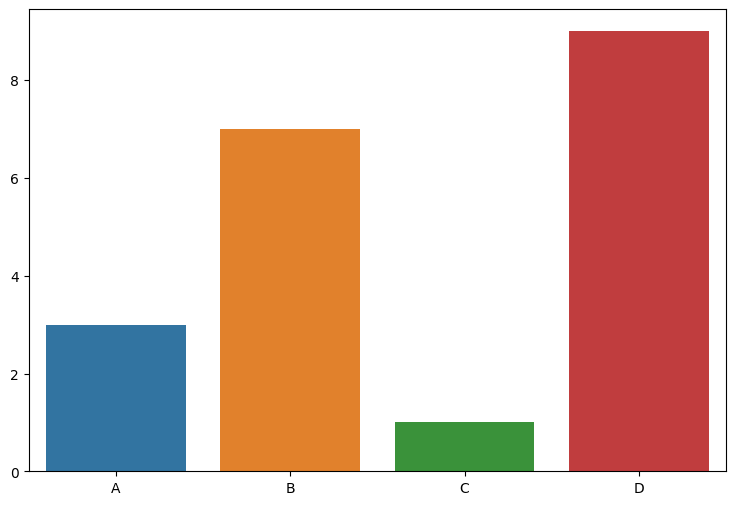

In [ ]:
# 데이터
labels = ['A', 'B', 'C', 'D']
values = [3, 7, 1, 9]

plt.figure(figsize=(9,6))
sns.barplot(x=labels, y=values)

### 2) 수평 막대 그래프 그리기

<Axes: >

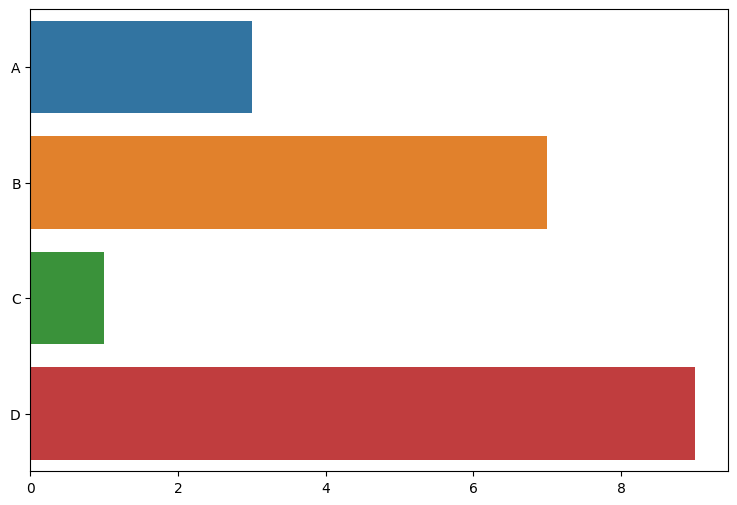

In [ ]:
plt.figure(figsize=(9,6))
sns.barplot(x=values, y=labels, orient='h')

### 3) 여러 그룹 데이터 비교하기

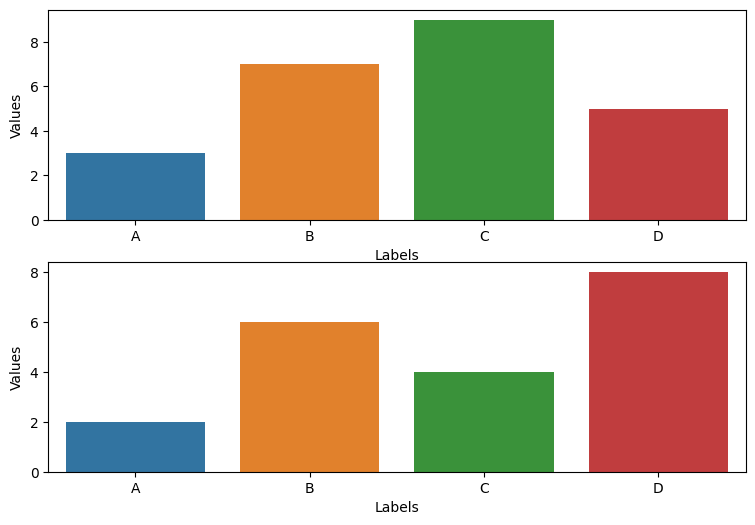

In [ ]:
plt.figure(figsize=(9,6))

plt.subplot(2,1,1)
sns.barplot(data=df[df['Group'] == 'Group 1'], x='Labels', y='Values')

plt.subplot(2,1,2)
sns.barplot(data=df[df['Group'] == 'Group 2'], x='Labels', y='Values')

plt.show()

### 4) 여러 그룹 하나의 그래프에 담기

<Axes: xlabel='Labels', ylabel='Values'>

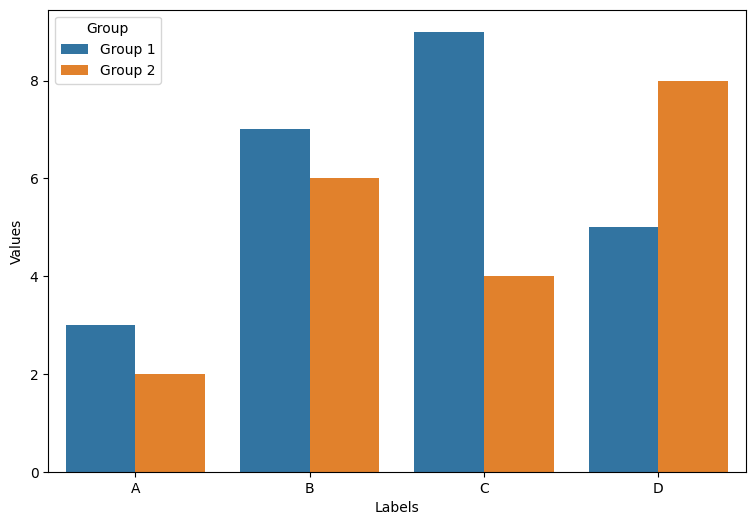

In [ ]:
plt.figure(figsize=(9,6))
sns.barplot(data=df, x='Labels', y='Values', hue='Group')

### 5) errorbar 그리기

<Axes: xlabel='Labels', ylabel='Values'>

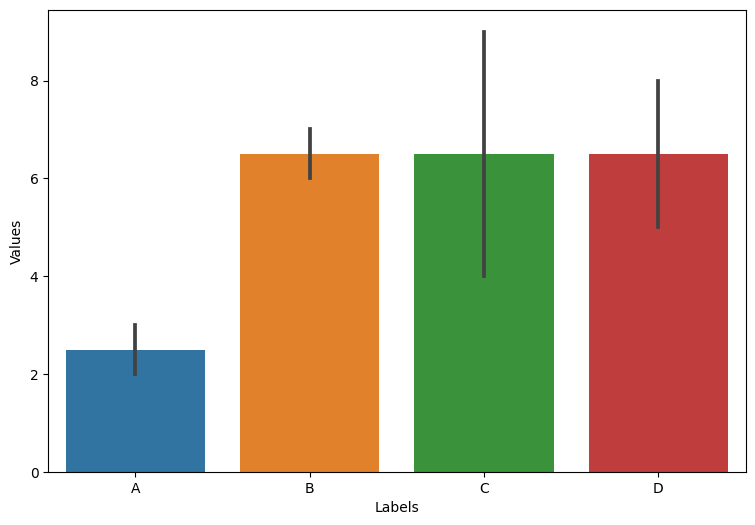

In [ ]:
plt.figure(figsize=(9,6))
sns.barplot(data=df, x='Labels', y='Values')

### 6) 누적 바 차트 그리기

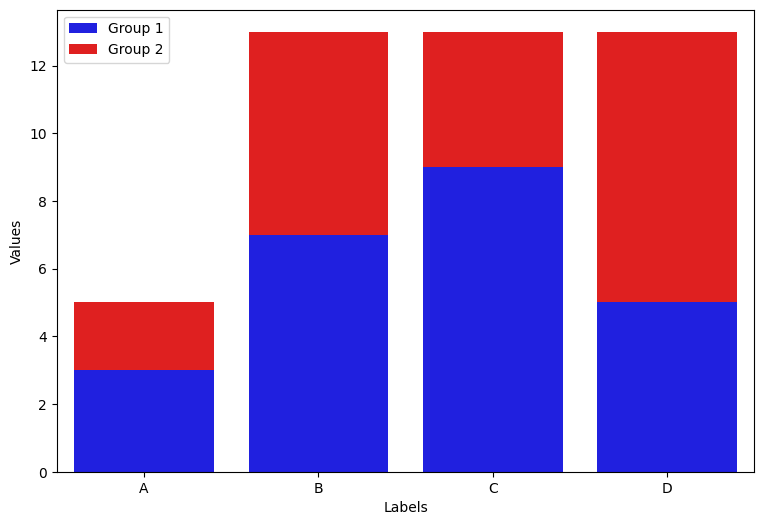

In [ ]:
# 그래프 그리기
plt.figure(figsize=(9,6))

# Value1을 기반으로 첫 번째 막대 그리기
sns.barplot(data=df[df['Group'] == 'Group 1'], x='Labels', y='Values', label='Group 1', color='b')

# Value1 + Value2를 기반으로 두 번째 막대 그리기 (누적)
sns.barplot(data=df[df['Group'] == 'Group 2'], x='Labels', y='Values', label='Group 2', color='r', bottom=df[df['Group'] == 'Group 1']['Values'])

plt.legend()
plt.show()

### 7) 100% 누적바 차트 그리기

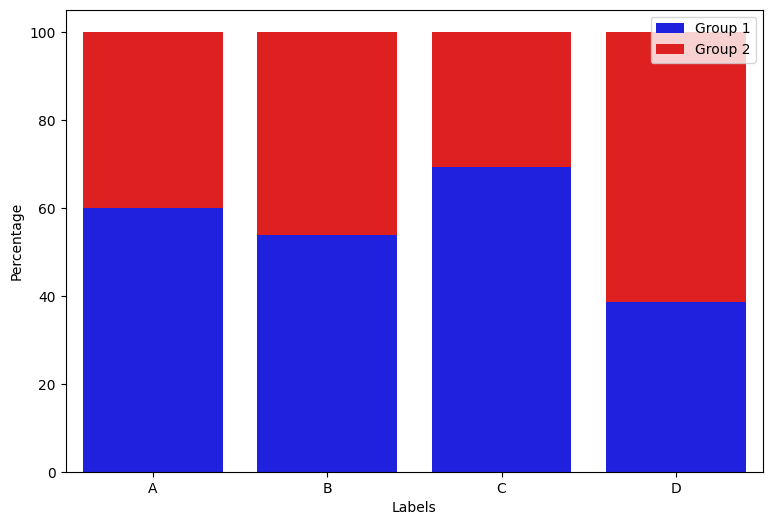

In [ ]:
# Calculate total values for each label to normalize to 100%
total_values = df.groupby('Labels')['Values'].sum().reset_index()
total_values.columns = ['Labels', 'Total_Values']

# Merge the total_values to the original dataframe
df = pd.merge(df, total_values, on='Labels')

# Normalize the Values to percentage
df['Values_Percentage'] = (df['Values'] / df['Total_Values']) * 100

# Create the plot
plt.figure(figsize=(9,6))

# Plot for Group 1
sns.barplot(data=df[df['Group'] == 'Group 1'], x='Labels', y='Values_Percentage', label='Group 1', color='b')

# Plot for Group 2 (stacked)
bottom_values = df[df['Group'] == 'Group 1']['Values_Percentage'].reset_index(drop=True)
sns.barplot(data=df[df['Group'] == 'Group 2'], x='Labels', y='Values_Percentage', label='Group 2', color='r', bottom=bottom_values)

plt.ylabel('Percentage')
plt.legend()
plt.show()
